#  Local interpretability

[Machine Learning Interpretability course](https://www.trainindata.com/p/machine-learning-interpretability)

In this notebook, we will evaluate the contribution of each feature towards the target value, for a single observation.

Based on [Christoph Molnar's book](https://christophm.github.io/interpretable-ml-book/limo.html#effect-plot)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import MinMaxScaler

### Load data

In [2]:
# load the California House price data from Scikit-learn
X, y = fetch_california_housing(return_X_y=True, as_frame=True)
X = X.drop(columns = ["Latitude", "Longitude", "AveBedrms"])

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0,
)

# Scale data
scaler = MinMaxScaler().set_output(transform="pandas").fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Linear regression

In [3]:
linreg = LinearRegression().fit(X_train, y_train)

In [4]:
coeffs = pd.Series(linreg.coef_, index=linreg.feature_names_in_)
coeffs

MedInc        6.569900
HouseAge      0.880922
AveRooms     -4.967091
Population    0.832171
AveOccup     -3.642405
dtype: float64

## Effect plots

The effect is the coefficient multiplied by the feature value. If we do this for each observation, we can better understand the contribution of each feature to the target.

Text(0, 0.5, 'Effects (coeff x feature)')

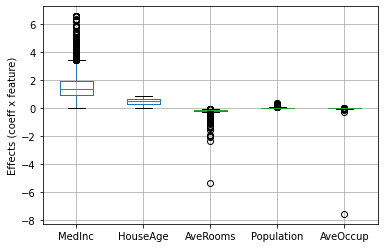

In [5]:
# multiply the coefficients by the feature values
effects = coeffs * X_test

# plot the effects
effects.boxplot(figsize=(8,6))
plt.ylabel("Effects (coeff x feature)")

## Local interpretability

Let's take an individual observation and evaluate how its feature values contribute towards house price.

In [6]:
# Let's pick up a few observations

X_test.tail()

,MedInc,HouseAge,AveRooms,Population,AveOccup
19681,0.179053,0.686275,0.029618,0.032652,0.002736
12156,0.250941,0.019608,0.060561,0.079122,0.004371
10211,0.508621,0.568627,0.050914,0.014574,0.002790
2445,0.107992,0.647059,0.038667,0.010090,0.004996
17914,0.288010,0.607843,0.033936,0.025617,0.003387


In [7]:
obs = 12156

X_test.loc[obs]

MedInc        0.250941
HouseAge      0.019608
AveRooms      0.060561
Population    0.079122
AveOccup      0.004371
Name: 12156, dtype: float64

In [8]:
effect = coeffs * X_test.loc[obs]
effect

MedInc        1.648660
HouseAge      0.017273
AveRooms     -0.300810
Population    0.065843
AveOccup     -0.015922
dtype: float64

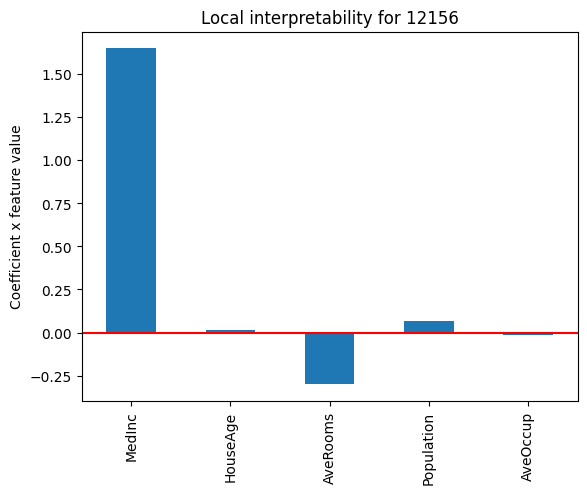

In [9]:
effect.plot.bar()

plt.axhline(y=0, color='r', linestyle='-')
plt.ylabel("Coefficient x feature value")
plt.title(f"Local interpretability for {obs}")
plt.show()

Text(0, 0.5, 'Effects (coeff x feature)')

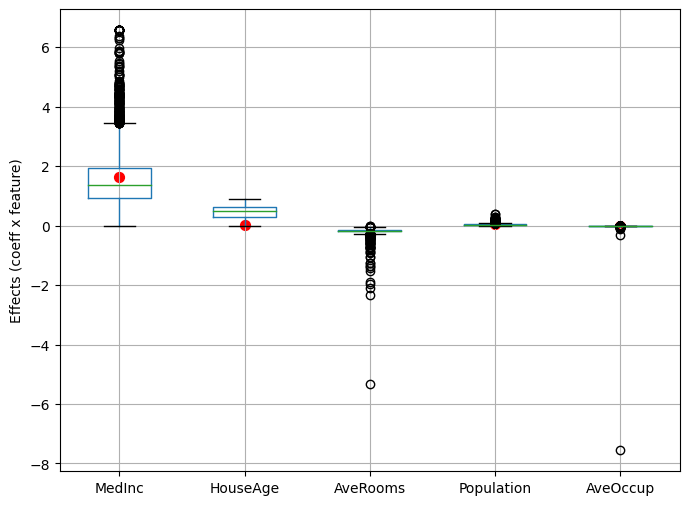

In [10]:
# overlay the individual observation to the effects

effects.boxplot(figsize=(8,6), positions=range(len(effects.columns)))
plt.scatter(effects.columns, effect,  marker='o', color="r", s=50)
plt.ylabel("Effects (coeff x feature)")

In [11]:
obs = 2445
X_test.loc[obs]

MedInc        0.107992
HouseAge      0.647059
AveRooms      0.038667
Population    0.010090
AveOccup      0.004996
Name: 2445, dtype: float64

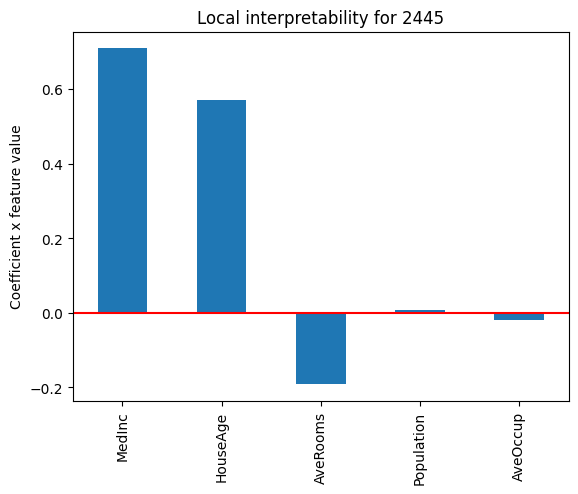

In [12]:
effect =  coeffs * X_test.loc[obs]
effect.plot.bar()

plt.axhline(y=0, color='r', linestyle='-')
plt.ylabel("Coefficient x feature value")
plt.title(f"Local interpretability for {obs}")
plt.show()

Text(0, 0.5, 'Effects (coeff x feature)')

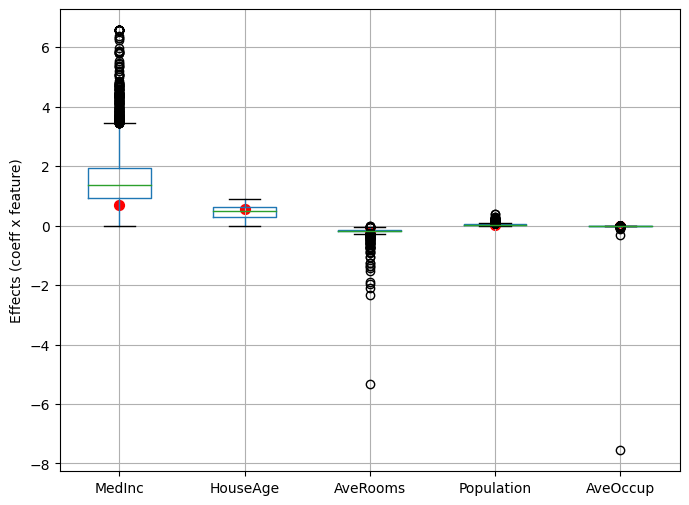

In [13]:
# overlay the individual observation to the effects

effects.boxplot(figsize=(8,6), positions=range(len(effects.columns)))
plt.scatter(effects.columns, effect,  marker='o', color="r", s=50)
plt.ylabel("Effects (coeff x feature)")